## COMP2006 -- Graded Lab 1

In this lab, you will gain some experience in **denoising** a dataset in the context of a specific objective. 

**Overall Objective**: Create a model that predicts rent prices as well as possible for typical New York City apartments.

**Data set**: make sure you use the data with the same number as your group number!

| Group | Data set |
| :-: | :-: |
| 1 | rent_1.csv |
| 2 | rent_2.csv |
| etc. | etc. |

**Important Notes:**
 - This lab is more open-ended so be prepared to think on your own, in a logical way, in order to solve the problem at hand
     - You should be able to support any decision you make with logical evidence
 - The data looks like the data we have been using in class but it has other **surprises**
     - Be sure to investigate the data in a way that allows you to discover all these surprises
 - Use [Chapter 5](https://mlbook.explained.ai/prep.html) of the textbook as a **guide**, except:
     - you only need to use **random forest** models;
     - exclude Section 5.5; 
 - Code submitted for this lab should be:
     - error free
         - to make sure this is the case, before submitting, close all Jupyter notebooks, exit Anaconda, reload the lab notebook and execute all cells
     - final code
         - this means that I don't want to see every piece of code you try as you work through this lab but only the final code; only the code that fulfills the objective
 - Use the **out-of-bag score** to evaluate models
     - Read Section 5.2 carefully so that you use this method properly
     - The oob score that you provide should be the average of 10 runs
 - Don't make assumptions!

I have broken the lab down into 4 main parts. 

### Part 0

Please provide the following information:
 - Group Number: 7
 - Group Members
     - Manuel Bishop Noriega 4362207
     - Robert E. Matney III 4364229

     

### Part 1 - Create and evaluate an initial model

#### Code (15 marks)

In [43]:
# importing panda to the code, to use dataframes.
import pandas as pd

# getting the csv file rent opened in a DataFrame
df = pd.read_csv("rent_7.csv")

# getting how many vectors/records are in the file
print(df.shape)

# creating table with just these columns of data with numbers
# it would also be possible to convert non-numeric data to numbers if needed
df_num = df[['bathrooms', 'bedrooms', 'longitude', 'latitude', 'price']]

# separating features vector and target columns
X_train = df_num.drop('price', axis=1)
y_train = df_num['price']

# creating an appropriate model with suitable hyper-parameters
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, n_jobs = -1)

# fit model to the training data
rf.fit(X_train, y_train)

# getting a relationship between X_train and y_train
r2 = rf.score(X_train, y_train)
print(f"{r2:.4f}")

rf = RandomForestRegressor(n_estimators = 100, n_jobs = -1, oob_score = True)

rf.fit(X_train, y_train)
noisy_oob_r2 = rf.oob_score_
print(f"OOB score {noisy_oob_r2:.4f}")

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np

X, y = df_num.drop('price', axis=1), df_num['price']

errors = []
print(f"Valiation MAE trials:", end='')
for i in range(7):
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.20)
    rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_predicted = rf.predict(X_test)
    e = mean_absolute_error(y_test, y_predicted)
    print(f"${e:.0f}", end='')
    errors.append(e)
print()
noisy_avg_mae = np.mean(errors)
print(f"Average validation MAE ${noisy_avg_mae:.0f}")



(20000, 16)
0.0691
OOB score -0.0067
Valiation MAE trials:$1146$1028$1315$1094$1017$1319$966
Average validation MAE $1126


#### Explanation (5 marks)

Please provide an explanation and justification for the code submitted in **Part 1** in the context of the overall objective. 

To start with the was getting the numbe of data entery rows and columns in the csv file.

Then we are training the machine based on the data that is given to look for a type of outcome. Trying to preform a model to help with trying to find a relationship between all of the data.

Next we are trying to use the model and what the machine has learned from the model to predict the average apartmet rent price. 

Then we did several valiation trails for get different amount of data to get the MAE.

From the data that is collected we get a MAE from that.

### Part 2 - Denoise the data

This section should only include the code necessary to **denoise** the data, NOT the code necessary to identify inconsistencies, problems, errors, etc. in the data. 

#### Code (25 marks)

18699    4490000
456      1150000
11320     111111
16876      85000
6428       80000
15663      55000
11245      53100
293        50550
19042      39995
10017      37000
Name: price, dtype: int64
bathrooms
1.0    15985
2.0     3124
3.0      301
1.5      242
0.0      121
2.5      109
4.0       69
3.5       33
4.5        8
5.0        5
5.5        2
6.0        1
Name: count, dtype: int64
bedrooms
1    6388
2    5918
0    3826
3    2942
4     802
5     100
6      22
8       2
Name: count, dtype: int64


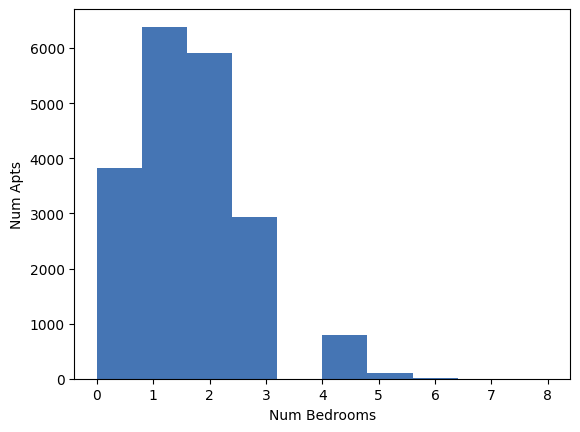

6


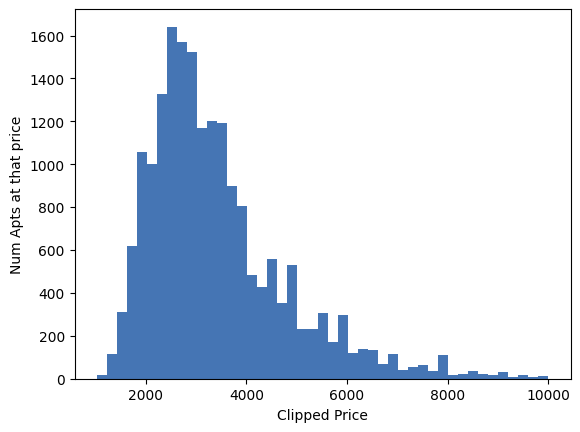

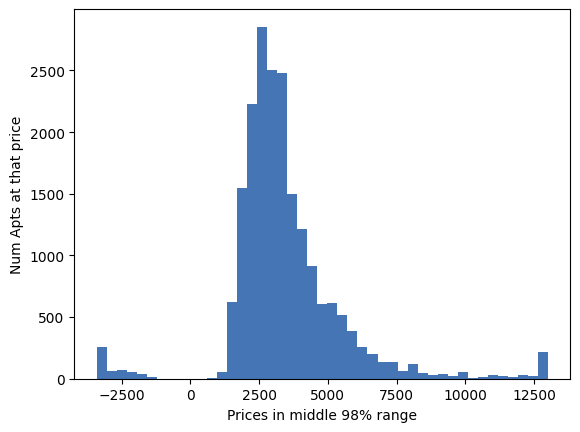

       bathrooms  bedrooms  longitude  latitude  price
2253         1.0         2        0.0       0.0   3619
4835         1.0         1        0.0       0.0   3600
7027         1.0         2        0.0       0.0   3200
8632         5.0         6        0.0       0.0   9995
14826        1.0         1        0.0       0.0   1725
19735        1.0         1        0.0       0.0   3495


In [45]:
import matplotlib.pyplot as plt
df_num.describe()

print(df_num.price.sort_values(ascending=False).head(10))
print(df_num.bathrooms.value_counts())  
print(df_num.bedrooms.value_counts())

bookcolors = { # our usual book color palette
        'crimson': '#a50026', 'red': '#d73027', 'redorange': 
        '#f46d43', 'orange': '#fdae61', 'yellow': '#fee090', 
        'sky': '#e0f3f8', 'babyblue': '#abd9e9', 'lightblue': 
        '#74add1', 'blue': '#4575b4', 'purple': '#313695'}

#creating a graph to see for the bedrooms 
fig,ax = plt.subplots()
ax.set_xlabel('Num Bedrooms')
ax.set_ylabel('Num Apts')
ax.hist(df_num.bedrooms, color=bookcolors['blue'])
plt.show()

#looking at the number of apartments with the error of the longitude and latitude
print(len(df[(df.longitude==0.0) & (df.latitude==0.0)]))

# looking for apartments in a local as well as with 1 bedroom and one bathroom
df_local = df[(df.latitude>40.746) & (df.latitude<40.7678) & 
        (df.longitude>=-73.9844) & (df.longitude<=-73.9842) &
        (df.bathrooms==1) & (df.bedrooms==1)]

df_local[['bedrooms', 'bathrooms','street_address','price']].sort_values('price')

# filter all record(training/testing)
df_clean = df_num[(df_num.price>1_000) & (df_num.price<10_000)]

# create a graph for the prices in the df_clean
fig,ax = plt.subplots()
ax.set_xlabel('Clipped Price')
ax.set_ylabel('Num Apts at that price')
ax.hist(df_clean.price, bins=45, color=bookcolors['blue'])
plt.show()

upper, lower = np.percentile(df.price, [1,99]) 
clipped = np.clip(df.price, upper, lower)
fig,ax = plt.subplots()
ax.set_xlabel('Prices in middle 98% range')
ax.set_ylabel('Num Apts at that price')
ax.hist(clipped, bins=45, color=bookcolors['blue'])
plt.show()

df_missing = df_clean[(df_clean.longitude==0) | (df_clean.latitude==0)]
print(df_missing)

#df_clean = df_clean[(df_clean.longitude!=0) | (df_clean.latitude!=0)]

df_clean = df_clean[(df_clean['latitude']>40.55) &
        (df_clean['latitude']<40.94) &
        (df_clean['longitude']>-74.1) &
        (df_clean['longitude']<-73.67)]
#print(len(df_clean))
#print(df_num.price[(df_num.price>0)&(df_num.price<2000)])

### Part 3 - Create and evaluate a final model

#### Code (15 marks)

In [ ]:
X, y = df_clean.drop('price', axis=1), df_clean['price']
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, #parallelize
                    oob_score=True) # get error estimate
rf.fit(X, y)
clean_oob_r2 = rf.oob_score_
print(f"Valiation OOB score {clean_oob_r2: 4f}")

errors = []
print(f"Valiation MAE trials:", end='')
for i in range(7):
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.20)
    rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_predicted = rf.predict(X_test)
    e = mean_absolute_error(y_test, y_predicted)
    print(f"${e:.0f}", end='')
    errors.append(e)
print()
noisy_avg_mae = np.mean(errors)
print(f"Average validation MAE ${noisy_avg_mae:.0f}")

from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
lm = Lasso(alpha=0.5) # create linear model
lm.fit(X_train, y_train)
print(f"LM Training score {lm.score(X_train, y_train):.4f}")
print(f"LM Validation score {lm.score(X_test, y_test):.4f}")

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators = 2000)
gbr.fit(X_train, y_train)
print(f"GB Training score {gbr.score(X_train, y_train):.4f}")
print(f"GB Validation score {gbr.score(X_test, y_test):.4f}")

#### Explanation (5 marks)

Please provide an explanation and justification for the code submitted in **Part 3** in the context of the overall objective. 

To start with we are trying to clean up some of the outliner in the data.
Then you run it to see how much it seemed to clean up the data.

Then the Lasso is a linear model to see if it will pull the data in a better way and see it if gives a better score. It does not.

Then we tried the gradient boosting model to see if it would give a different score for the data.  It did not do any better either.

### Part 4 - Document the problems (35 marks)

In this part, please use the table below to document your understanding of all the data issues you discovered. Note that **no code** should be included, as that should be covered in **Part 2**. Also, note that even if one line of code fixed a few problems, you should list each problem separately in the table below, so be sure you have investigated the data properly. For example, if the list `[-6, 5, 0, 50]` represents heights of adults, the -6, 0, and 50 would represent three data issues to be included in the table below, even though one line of code may be able to address all of them. 

| Data issue discovered | Why is this a problem? | How did you fix it? | Why is this fix appropriate? |
| :- | :- | :- | :- | 
| example problem 1: The longitude and Latitude both have some data entry that have 0.  | Which is this impossible because if it was the case then those apartments would not be in the area of New York but somewhere out in the Ocean or the equator. |  So, what needs to be done is to find all the data entry sets that have either the longitude or latitudeset as 0 and remove them from the model. | This fix is appropriate because those data sets with those number could be good data in the rest of the columns. The data could have been entered wrong or mistyped. |
|  example problem 2: The such degree in the price being so low to the price being so high to get the mead of the price of apartments rentals. | The problem with there be extreme low prices and extreme high prices is that it throws off the mean average price for the apartments rentals.    | So in order to fix this you can remove the lower 1 % and the upper 1% as well. | What this will do is help remove any mistakes that could have been made in either mistyping or just given the wrong data by accident. |
